In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
#Importing the Tree and Metrics Module
from sklearn import metrics

#Decision Tree Algorithm and plot_tree function
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Train-Test Split
from sklearn.model_selection import train_test_split

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Explore Data Set

In [3]:
df = pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\angelo avila - insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.shape

(1000, 32)

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,203.95,38.95,546238.65,1136.00,1256.41,1101000.00,25126.10,-26793.70,11.64,1.84,0.99,1.49,52761.94,7433.42,7399.57,37928.95,2005.10
std,115.11,9.14,257063.01,611.86,244.17,2297406.60,27872.19,28104.10,6.95,1.02,0.82,1.11,26401.53,4880.95,4824.73,18886.25,6.02
min,0.00,19.00,100804.00,500.00,433.33,-1000000.00,0.00,-111100.00,0.00,1.00,0.00,0.00,100.00,0.00,0.00,70.00,1995.00
25%,115.75,32.00,335980.25,500.00,1089.61,0.00,0.00,-51500.00,6.00,1.00,0.00,1.00,41812.50,4295.00,4445.00,30292.50,2000.00
50%,199.50,38.00,533135.00,1000.00,1257.20,0.00,0.00,-23250.00,12.00,1.00,1.00,1.00,58055.00,6775.00,6750.00,42100.00,2005.00
75%,276.25,44.00,759099.75,2000.00,1415.70,0.00,51025.00,0.00,17.00,3.00,2.00,2.00,70592.50,11305.00,10885.00,50822.50,2010.00
max,479.00,64.00,999435.00,2000.00,2047.59,10000000.00,100500.00,0.00,23.00,4.00,2.00,3.00,114920.00,21450.00,23670.00,79560.00,2015.00


In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim             

In [7]:
to_drop = ['auto_model','auto_make','policy_csl']
df.drop(to_drop,axis=1,inplace=True)

In [8]:
cat_cols = ['fraud_reported','police_report_available','property_damage','authorities_contacted','incident_severity','collision_type','incident_type','insured_relationship','insured_hobbies','insured_occupation','insured_education_level','insured_sex']
df1 = pd.get_dummies(df,columns = cat_cols)

In [9]:
### Check for missing values
total = df1.isnull().sum().sort_values(ascending=False)
total

months_as_customer                        0
insured_occupation_adm-clerical           0
insured_hobbies_video-games               0
insured_hobbies_sleeping                  0
insured_hobbies_skydiving                 0
insured_hobbies_reading                   0
insured_hobbies_polo                      0
insured_hobbies_paintball                 0
insured_hobbies_movies                    0
insured_hobbies_kayaking                  0
insured_hobbies_hiking                    0
insured_hobbies_golf                      0
insured_hobbies_exercise                  0
insured_hobbies_dancing                   0
insured_hobbies_cross-fit                 0
insured_hobbies_chess                     0
insured_hobbies_camping                   0
insured_hobbies_bungie-jumping            0
insured_hobbies_board-games               0
insured_hobbies_basketball                0
insured_hobbies_base-jumping              0
insured_hobbies_yachting                  0
insured_occupation_armed-forces 

### Pre Processing

In [10]:
x = df1.drop(["fraud_reported_Y"], axis=1)
y = df1["fraud_reported_Y"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 90), (250, 90), (750,), (250,))

In [11]:
## Scale the dataset

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

#Train the model
clf.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25)

In [14]:
y_pred = clf.predict(x_test_scaled)

#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

100.00%


In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        61

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250




In [16]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[189   0]
 [  0  61]]


In [17]:
#Encode Confusion Matrix into a DataFrame

#Set Labels
labels = list(y_test.unique())

#Get confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#Convert to DataFrame
cm_df = pd.DataFrame(cm,index=labels, columns=labels)

cm_df

,0,1
0,189,0
1,0,61


### Feature Importance

In [18]:
#Extract the feature importance
f_importance = clf.feature_importances_

#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

#Sort the values in Descending order (Most Important -> Least Important)
df_feature_importance.sort_values(["Importance"],ascending=False)

,Importance
fraud_reported_N,1.00
months_as_customer,0.00
insured_hobbies_kayaking,0.00
insured_hobbies_yachting,0.00
insured_hobbies_video-games,0.00
insured_hobbies_sleeping,0.00
insured_hobbies_skydiving,0.00
insured_hobbies_reading,0.00
insured_hobbies_polo,0.00
insured_hobbies_paintball,0.00


<AxesSubplot:>

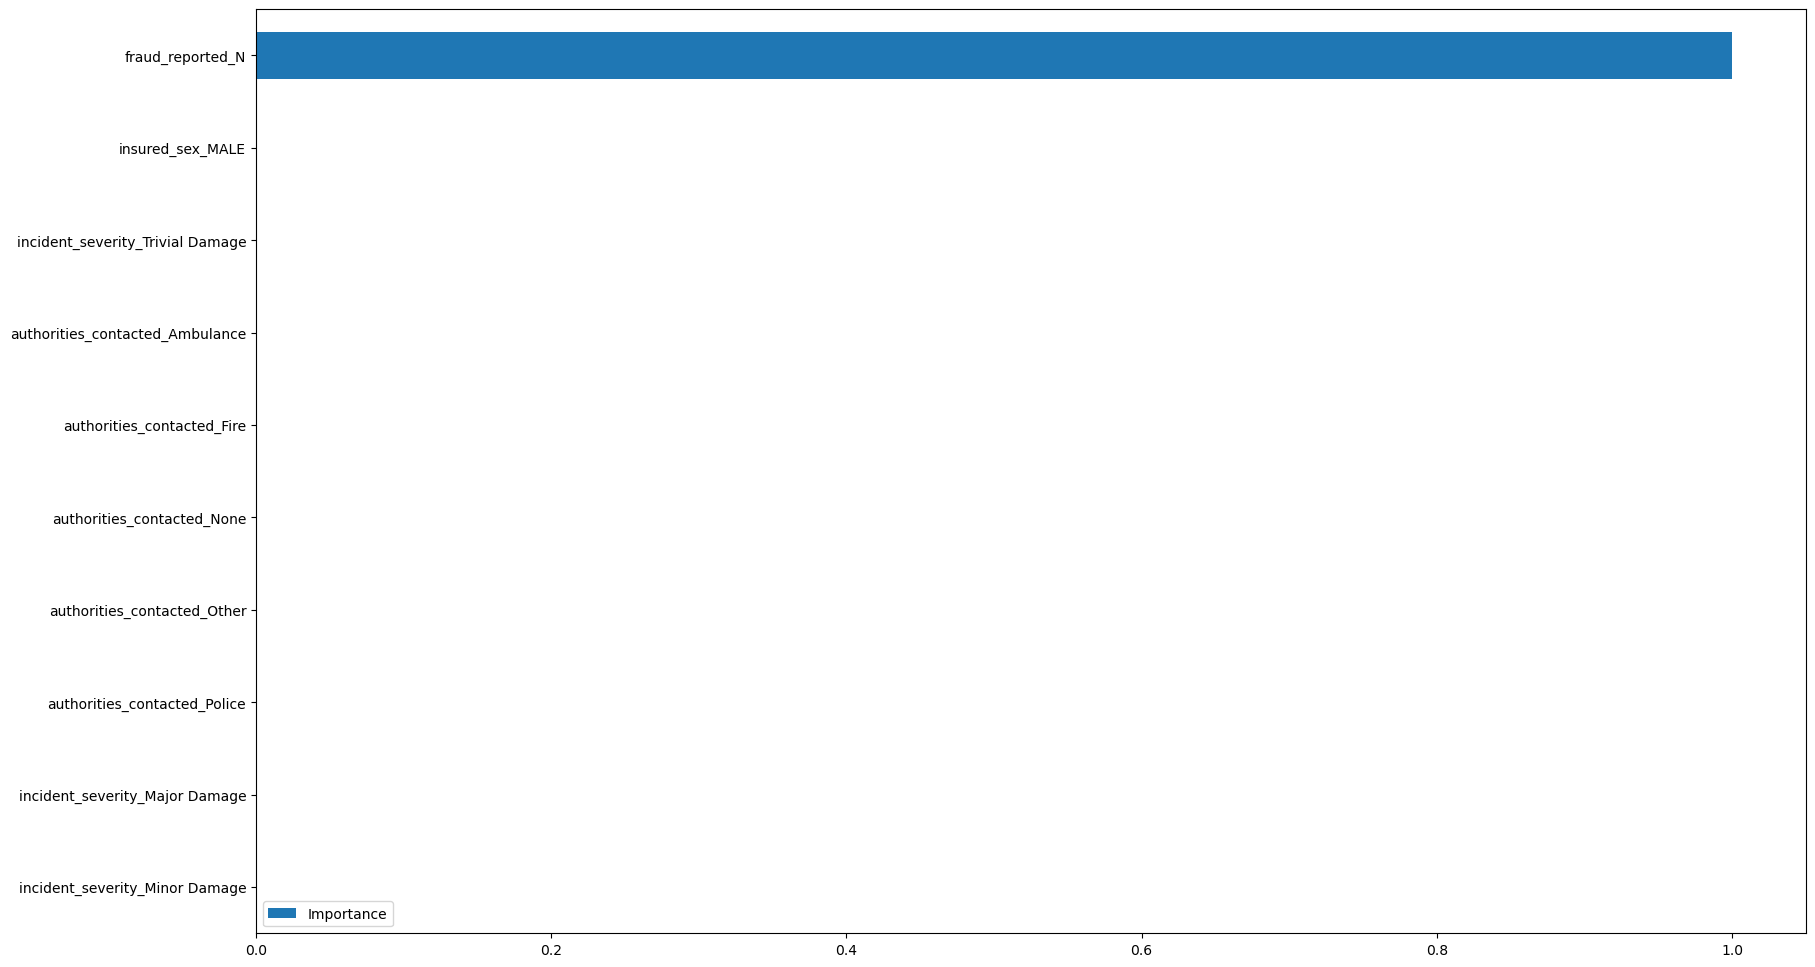

In [19]:
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_asc.plot(kind='barh', figsize=(20,12))

In [20]:
feature_col = list(x_train.columns)

#Get classes
classes = clf.classes_

#Convert to String if number
classes = ["%s" % clas for clas in classes]

classes

['0', '1']

### Visualize Decision Tree

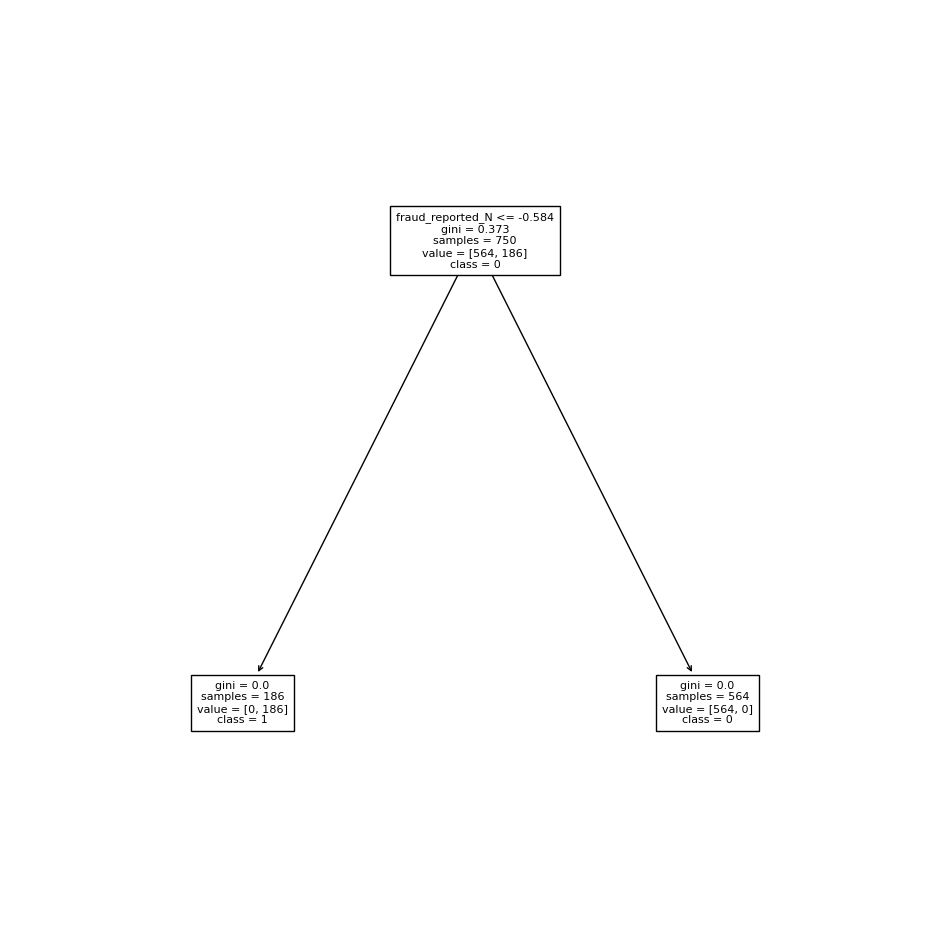

In [21]:
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))  

#Use the plot tree function
plot_tree(clf, class_names=classes, feature_names=feature_col, fontsize=8, max_depth=3)

#Show the Plot
plt.show()

### Cross Validation

In [22]:
#Import the Cross Validation Score function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [23]:
# Create a pipeline to add scaling to the original dataframe 
#(we want to scale based on the train partitions on every fold)

from sklearn.pipeline import make_pipeline

clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

model = make_pipeline(StandardScaler(), clf)

cv_results = cross_val_score(model, x_train, y_train, cv=5)

print(cv_results)

[1. 1. 1. 1. 1.]


In [24]:
#Get the Mean to get the average accuracy 
print("Accuracy: {:.2%}".format(np.mean(cv_results)))

Accuracy: 100.00%


In [25]:
cv_results = cross_validate(model, x_train, y_train,  scoring = ['accuracy', 'f1_weighted','roc_auc'], cv=5)
print (cv_results)

{'fit_time': array([0.01099467, 0.01400089, 0.01199627, 0.01306748, 0.01092935]), 'score_time': array([0.01000071, 0.01200342, 0.0139997 , 0.00900102, 0.00416255]), 'test_accuracy': array([1., 1., 1., 1., 1.]), 'test_f1_weighted': array([1., 1., 1., 1., 1.]), 'test_roc_auc': array([1., 1., 1., 1., 1.])}


In [26]:
df_scores = pd.DataFrame(cv_results)

print (df_scores)
print('Averages \nAccuracy: {:2%}, f1: {:2%}, roc_auc: {:2%}'.format(np.mean(df_scores.test_accuracy),np.mean(df_scores.test_f1_weighted),np.mean(df_scores.test_roc_auc)))

   fit_time  score_time  test_accuracy  test_f1_weighted  test_roc_auc
0      0.01        0.01           1.00              1.00          1.00
1      0.01        0.01           1.00              1.00          1.00
2      0.01        0.01           1.00              1.00          1.00
3      0.01        0.01           1.00              1.00          1.00
4      0.01        0.00           1.00              1.00          1.00
Averages 
Accuracy: 100.000000%, f1: 100.000000%, roc_auc: 100.000000%


In [27]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=20, random_state=25)
model = make_pipeline(StandardScaler(), clf )


cv_results = cross_validate(model, x_train, y_train,  scoring = ['accuracy', 'f1_weighted','roc_auc'], cv=5)
df_scores = pd.DataFrame(cv_results)
df_scores
print (df_scores)
print('Averages \nAccuracy: {:2%}, f1: {:2%}, roc_auc: {:2%}'.format(np.mean(df_scores.test_accuracy),np.mean(df_scores.test_f1_weighted),np.mean(df_scores.test_roc_auc)))

   fit_time  score_time  test_accuracy  test_f1_weighted  test_roc_auc
0      0.01        0.01           1.00              1.00          1.00
1      0.01        0.01           1.00              1.00          1.00
2      0.01        0.01           1.00              1.00          1.00
3      0.01        0.01           1.00              1.00          1.00
4      0.01        0.01           1.00              1.00          1.00
Averages 
Accuracy: 100.000000%, f1: 100.000000%, roc_auc: 100.000000%


### Build Model Parameter

In [28]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)
model = make_pipeline(StandardScaler(), clf )

clf.fit(x_train_scaled, y_train)

y_pred = clf.predict(x_test_scaled)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00        61

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250


